<a href="https://colab.research.google.com/github/daianna21/mushroom_kNN_clasification/blob/master/kNN_mushroom_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Machine Learning, classify mushrooms by kNN

In [ ]:

!python --version


Python 3.7.12


## Import Libraries

```
## Code format
```



In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.manifold import TSNE
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from csv import reader
import numpy as np

In [ ]:
## Scikit Version
import sklearn
print(sklearn.__version__)

1.0.2


## Explore Data

In [76]:
## Read csv file 
mushroom_data = pd.read_csv("agaricus-lepiota.data", header=None, index_col=0)
## Set classes 
mushroom_classes=mushroom_data.index
## Convert to vector
vector_data= np.array(mushroom_data).reshape(mushroom_data.shape[0]*mushroom_data.shape[1],1)
## Create Encoder 
le = preprocessing.LabelEncoder()
## Convert string labels into numbers
vector_encoded=le.fit_transform(vector_data)
mushroom_classes=le.fit_transform(mushroom_classes)
## Restore data matrix 
mushroom_data=np.reshape(vector_encoded,(mushroom_data.shape[0] , mushroom_data.shape[1]))
## Delete 11th attribute (9th column)
mushroom_data_21at= np.delete(mushroom_data,(9), axis = 1)
## Let 5% of data for prediction
X_training_test_data, X_prediction_data, y_training_test_data, y_prediction_data = train_test_split(mushroom_data, mushroom_classes, test_size=0.05, random_state=0)

print(X_training_test_data)
print(y_training_test_data)




[[ 9 22 12 ... 20 19  4]
 [21  6 12 ... 12 19  4]
 [ 2 16 12 ... 22 19 10]
 ...
 [21 16  7 ... 12 16  7]
 [ 6  6 12 ... 12 19  4]
 [21 22  7 ... 12 22  4]]
[1 0 0 ... 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Data preparation

In [77]:
## Separate data set into trainig data (70%) and testing data (30%)
## Generate always the same data partition
X_train, X_test, y_train, y_test = train_test_split(X_training_test_data, y_training_test_data, test_size=0.30, random_state=0)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(y_test)

5401
5401
2316
2316
[1 0 1 ... 0 1 0]


## Training

In [78]:

def training_kNN(k, X_train, y_train, X_test):
  ## Define classifier, gets k parameter
  classifier = KNeighborsClassifier(n_neighbors=k)
  ## Train classifier with training data and their respective classes 
  classifier.fit(X_train, y_train)
  ## Validate predictive power of classifier with testing data
  y_predict=classifier.predict(X_test)
  return(y_predict, classifier)

training_kNN(1, X_train, y_train, X_test)

(array([1, 0, 1, ..., 0, 1, 0]), KNeighborsClassifier(n_neighbors=1))

## Validation

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-score: 1.0
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1188
   Poisonous       1.00      1.00      1.00      1128

    accuracy                           1.00      2316
   macro avg       1.00      1.00      1.00      2316
weighted avg       1.00      1.00      1.00      2316



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

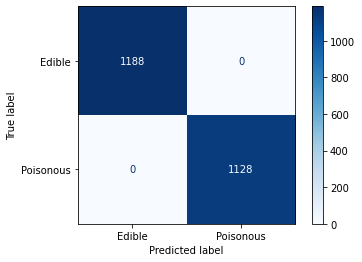

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


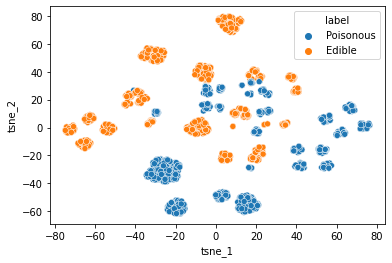

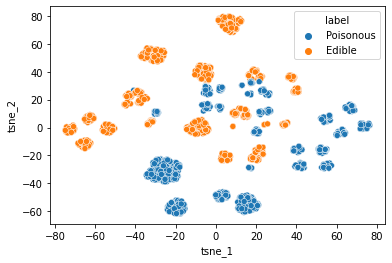

In [79]:

def validation_kNN(k, X_train, y_train, X_test, y_test):
  classifier=training_kNN(k, X_train, y_train, X_test)[1]
  y_predict=training_kNN(k, X_train, y_train, X_test)[0]
  ## Validation scores
  print("Accuracy: {}".format(accuracy_score(y_test, y_predict))) ## ver si los datos están balanceados
  print("Precision: {}".format(precision_score(y_test, y_predict, average="macro")))
  print("Recall: {}".format(recall_score(y_test, y_predict, average="macro")))
  print("F-score: {}".format(f1_score(y_test, y_predict, average="macro")))

  ## Class names
  target_names = ['Edible', 'Poisonous']

  ## Classification report
  print(classification_report(y_test, y_predict, target_names=target_names))
  ## Plot confusion matrix
  fig = plt.figure( )
  fig=plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, 
                        display_labels=target_names)
  plt.savefig(f'Confusion_matrix_k{k}.pdf')
  plt.show()

  ## Reduce data dimensions 
  X_test_embedded = TSNE(n_components=2).fit_transform(X_test)
  X_test_embedded.shape

  ## Scatterplot of testing data
  ## Create labels
  y_test_str=[]
  for i in y_test:
    ## First instance is poisonous
    if i==mushroom_classes[0]:
      y_test_str.append('Poisonous')
    else:
      y_test_str.append('Edible')
  fig = plt.figure( )
  tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': y_test_str})
  sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)
  plt.savefig(f'Scatterplot_testing_data_k{k}.pdf')
  plt.show()

  ## Scatterplot of predicted testing data
  y_predict_str=[]
  for i in y_predict:
    ## First instance is poisonous
    if i==mushroom_classes[0]:
      y_predict_str.append('Poisonous')
    else:
      y_predict_str.append('Edible')
  fig = plt.figure( )
  tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': y_predict_str})
  sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)
  plt.savefig(f'Scatterplot__predicted_data_k{k}.pdf')
  plt.show()

validation_kNN(1, X_train, y_train, X_test, y_test)

## Predict

In [ ]:
def predict_data(k, x_train, y_train, X_prediction_data):
  # Get classifier
  classifier = training_kNN(k, x_train, y_train, X_prediction_data)[1]
  # Predict values
  predictions = classifier.predict(X_prediction_data)
  # Predicted-values associated probablities
  probabs = classifier.predict_proba(X_prediction_data)
  # Predicted-values neighbors
  neighbors = classifier.kneighbors(X_prediction_data)
  # Store results in dictionary
  results = {"Predictions" : predictions, "Probabilities" : probabs, "Neighbors" : neighbors}
  return (results)

# Predict with 5% of original data
k = 5
results = predict_data(k, X_train, y_train, X_prediction_data)
# Predictions
print(results["Predictions"])
# Probabilities are really strong
unique_probabs = set([x for x in results["Predictions"]])
print(f"Probabilities associated to model: {unique_probabs}")

[1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1
 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0
 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1]
Probabilities associated to model: {0, 1}


In [ ]:
def compare_predictions(k_values, x_train, y_train, X_prediction_data):
  # Iterate over k values
  for i in k_values:
    # Get prediction results
    results = predict_data(i, x_train, y_train, X_prediction_data)
    predictions = set([x for x in results["Predictions"]])
    
    print(results["Probabilities"])

compare_predictions([1,3,5,7,11], X_train, y_train, X_prediction_data)